## Init Tensor

In [ ]:
import torch
import matplotlib.pyplot as plt


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

t = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float16, device=device, requires_grad=True)
print(t)
print(t.dtype)
print(t.device)
print(t.shape)
print(t.requires_grad)

Using cuda device
tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0', dtype=torch.float16,
       requires_grad=True)
torch.float16
cuda:0
torch.Size([2, 3])
True


## Common Init

In [ ]:
# Initialize a tensor with zeros
zeros_tensor = torch.zeros((2, 3), device=device)
print("Zeros Tensor:")
print(zeros_tensor)

# Initialize a tensor with ones
ones_tensor = torch.ones((2, 3), device=device)
print("\nOnes Tensor:")
print(ones_tensor)

# Initialize a tensor with random values
random_tensor = torch.rand((2, 3), device=device)
print("\nRandom Tensor:")
print(random_tensor)

# Initialize a tensor with a specific value
specific_value_tensor = torch.full((2, 3), 7, device=device)
print("\nSpecific Value Tensor:")
print(specific_value_tensor)

# Initialize a tensor with values from a normal distribution

normal_tensor = torch.randn((2, 3), device=device)
print("\nNormal Distribution Tensor:")
print(normal_tensor)

Zeros Tensor:
tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')

Ones Tensor:
tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')

Random Tensor:
tensor([[0.9901, 0.6388, 0.8085],
        [0.3972, 0.2292, 0.9534]], device='cuda:0')

Specific Value Tensor:
tensor([[7, 7, 7],
        [7, 7, 7]], device='cuda:0')

Normal Distribution Tensor:
tensor([[-0.1950,  0.4629,  1.1944],
        [-0.8581,  0.8200, -0.7476]], device='cuda:0')


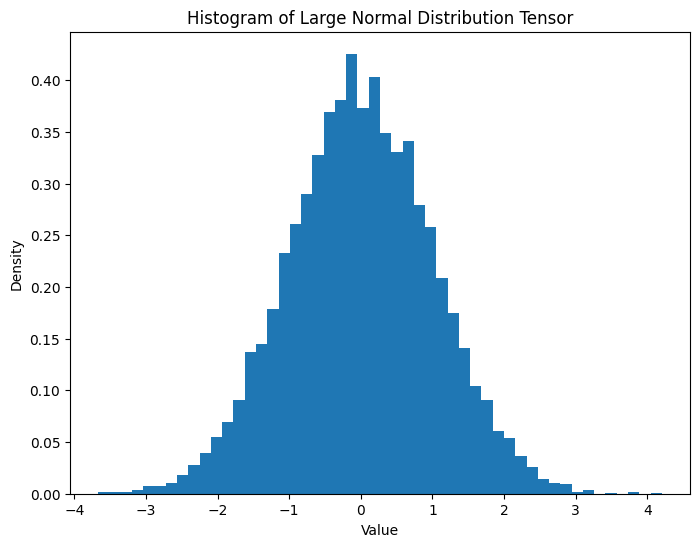

In [ ]:
# Create a large tensor with values from a normal distribution
large_normal_tensor = torch.normal(mean=0.0, std=1.0, size=(10000,), device=device)

# Convert the tensor to a numpy array for plotting
large_normal_np = large_normal_tensor.cpu().numpy()

# Plot a histogram of the tensor values
plt.figure(figsize=(8, 6))
plt.hist(large_normal_np, bins=50, density=True)
plt.title('Histogram of Large Normal Distribution Tensor')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()